1. OPERACIONES CON ARRAYS NUMPY

1.1 Creación de arrays
------------------------------
Array 1D desde lista: [1 2 3 4 5]

Array 2D desde lista anidada:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Arrays desde funciones constructoras:
Ceros: [0. 0. 0. 0. 0.]
Unos: [[1. 1. 1.]
 [1. 1. 1.]]
Valores constantes: [[7 7]
 [7 7]]
Matriz identidad: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Valores aleatorios [0,1): [[0.37454012 0.95071431]
 [0.73199394 0.59865848]]
Valores aleatorios normales: [[-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]]
Rango secuencial: [0 2 4 6 8]
Rango espaciado uniformemente: [0.   0.25 0.5  0.75 1.  ]

1.2 Atributos y propiedades de arrays
------------------------------
Forma (dimensiones): (3, 4, 5)
Número de dimensiones: 3
Tipo de datos: int64
Número total de elementos: 60
Tamaño en bytes: 480

1.3 Indexación y slicing
------------------------------
Array original:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Indexación básica:
Elemento en (0,0): 1
Elemento en (2,3): 12

Slicin

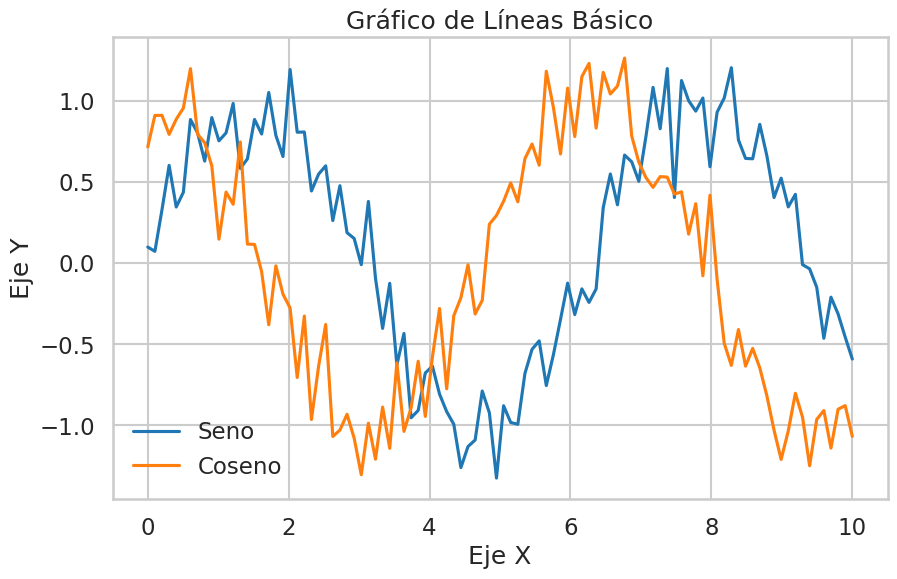


EJERCICIOS PRÁCTICOS

1. Crear un array 3D con valores aleatorios y calcular la media por cada "profundidad".
2. Comparar el rendimiento entre apply y vectorización para una función personalizada.
3. Crear un gráfico combinado con un histograma y un boxplot para la variable 'salario'.
4. Crear un dashboard simple con 4 visualizaciones diferentes usando los datos estudiados.


FIN DEL SCRIPT - ¡GRACIAS POR PARTICIPAR EN LA CLASE!


In [ ]:
# Clase: Análisis y Visualización de Datos con NumPy, Pandas y Matplotlib
# Autor: Dr. Dario Diaz
# Fecha: 10 de abril de 2025

# Instalación de bibliotecas (descomenta si estás en un entorno nuevo)
# !pip install numpy pandas matplotlib seaborn plotly

# PARTE 1: NUMPY - OPERACIONES CON ARRAYS
# =============================================

# Importación de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.express as px

# Configuración para visualización en notebook
%matplotlib inline

# Manejo compatible de estilos en diferentes versiones de Matplotlib
try:
    # Para versiones más nuevas de Matplotlib (≥3.6)
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    try:
        # Para versiones antiguas
        plt.style.use('seaborn-whitegrid')
    except:
        # Fallback a un estilo predeterminado si ninguno funciona
        print("Usando estilo predeterminado de Matplotlib")

# Configuración directa de Seaborn (esto funciona independientemente de la versión)
sns.set_style("whitegrid")
sns.set_context("talk")

# Configuración para reproducibilidad
np.random.seed(42)

print("="*50)
print("1. OPERACIONES CON ARRAYS NUMPY")
print("="*50)

# 1.1 Creación de arrays
print("\n1.1 Creación de arrays\n" + "-"*30)

# Desde listas de Python
lista_simple = [1, 2, 3, 4, 5]
array_1d = np.array(lista_simple)
print("Array 1D desde lista:", array_1d)

# Array bidimensional
lista_anidada = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
array_2d = np.array(lista_anidada)
print("\nArray 2D desde lista anidada:")
print(array_2d)

# Funciones constructoras
print("\nArrays desde funciones constructoras:")
print("Ceros:", np.zeros(5))
print("Unos:", np.ones((2, 3)))
print("Valores constantes:", np.full((2, 2), 7))
print("Matriz identidad:", np.eye(3))
print("Valores aleatorios [0,1):", np.random.random((2, 2)))
print("Valores aleatorios normales:", np.random.normal(0, 1, (2, 2)))
print("Rango secuencial:", np.arange(0, 10, 2))
print("Rango espaciado uniformemente:", np.linspace(0, 1, 5))

# 1.2 Atributos y propiedades de arrays
print("\n1.2 Atributos y propiedades de arrays\n" + "-"*30)

# Crear un array de muestra
muestra = np.random.randint(0, 100, (3, 4, 5))

# Explorar atributos
print("Forma (dimensiones):", muestra.shape)
print("Número de dimensiones:", muestra.ndim)
print("Tipo de datos:", muestra.dtype)
print("Número total de elementos:", muestra.size)
print("Tamaño en bytes:", muestra.nbytes)

# 1.3 Indexación y slicing
print("\n1.3 Indexación y slicing\n" + "-"*30)

# Crear array de ejemplo
arr_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print("Array original:")
print(arr_2d)

# Indexación básica
print("\nIndexación básica:")
print("Elemento en (0,0):", arr_2d[0, 0])
print("Elemento en (2,3):", arr_2d[2, 3])

# Slicing básico
print("\nSlicing básico:")
print("Primera fila:", arr_2d[0, :])
print("Primera columna:", arr_2d[:, 0])
print("Submatriz 2x2 (esquina superior izquierda):")
print(arr_2d[:2, :2])
print("Submatriz 2x2 (esquina inferior derecha):")
print(arr_2d[1:, 2:])

# Slicing con saltos
print("\nSlicing con saltos:")
print("Filas alternas:", arr_2d[::2, :])
print("Columnas alternas:", arr_2d[:, ::2])

# Indexación con arrays de booleanos
print("\nIndexación con condiciones booleanas:")
mask = arr_2d > 6
print("Máscara de elementos > 6:")
print(mask)
print("Elementos > 6:", arr_2d[mask])

# 1.4 Operaciones vectorizadas y broadcasting
print("\n1.4 Operaciones vectorizadas\n" + "-"*30)

# Vectorización vs. bucles tradicionales
def suma_con_bucle(lista1, lista2):
    """Suma dos listas utilizando bucles."""
    resultado = []
    for i in range(len(lista1)):
        resultado.append(lista1[i] + lista2[i])
    return resultado

# Crear datos de prueba
tamano = 1000000
lista1 = list(range(tamano))
lista2 = list(range(tamano))
arr1 = np.array(lista1)
arr2 = np.array(lista2)

# Medir tiempo con bucles (solo para 1000 elementos)
inicio = time.time()
resultado_bucle = suma_con_bucle(lista1[:1000], lista2[:1000])
fin = time.time()
tiempo_bucle = fin - inicio
print(f"Tiempo con bucles (1000 elementos): {tiempo_bucle:.6f} segundos")

# Medir tiempo con NumPy
inicio = time.time()
resultado_numpy = arr1 + arr2  # Todos los elementos
fin = time.time()
tiempo_numpy = fin - inicio
print(f"Tiempo con NumPy ({tamano} elementos): {tiempo_numpy:.6f} segundos")

# Operaciones aritméticas básicas
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print("\nOperaciones aritméticas básicas:")
print("a + b =", a + b)
print("a - b =", a - b)
print("a * b =", a * b)  # Multiplicación elemento a elemento
print("a / b =", a / b)
print("a ** 2 =", a ** 2)  # Exponenciación
print("a % 2 =", a % 2)  # Módulo

# Funciones universales (ufuncs)
print("\nFunciones universales:")
print("Seno:", np.sin(a))
print("Exponencial:", np.exp(a))
print("Logaritmo natural:", np.log(a))
print("Suma de todos los elementos:", np.sum(a))
print("Valor mínimo:", np.min(a))
print("Valor máximo:", np.max(a))
print("Media aritmética:", np.mean(a))

# 1.5 Broadcasting
print("\n1.5 Broadcasting\n" + "-"*30)

# Ejemplo 1: Sumar un escalar a cada elemento
arr = np.array([[1, 2, 3], [4, 5, 6]])
print("Array original:")
print(arr)
print("\nSumando 10 a cada elemento:")
print(arr + 10)

# Ejemplo 2: Sumar un vector a cada fila
vector_fila = np.array([10, 20, 30])
print("\nSumando un vector a cada fila:")
print(arr + vector_fila)  # El vector se replica para cada fila

# Ejemplo 3: Sumar un vector a cada columna
vector_columna = np.array([[100], [200]])
print("\nSumando un vector a cada columna:")
print(arr + vector_columna)  # El vector se replica para cada columna

# PARTE 2: ANÁLISIS ESTADÍSTICO CON PANDAS Y NUMPY
# =============================================

print("\n" + "="*50)
print("2. ANÁLISIS ESTADÍSTICO CON PANDAS Y NUMPY")
print("="*50)

# Crear un DataFrame de ejemplo con datos sintéticos
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'edad': np.random.normal(35, 10, n).astype(int),
    'salario': np.random.normal(50000, 15000, n),
    'experiencia': np.random.normal(10, 5, n),
    'satisfaccion': np.random.uniform(1, 10, n),
    'departamento': np.random.choice(['Ventas', 'Marketing', 'IT', 'RRHH'], n)
})

# 2.1 Estadísticas descriptivas básicas
print("\n2.1 Estadísticas descriptivas básicas\n" + "-"*30)

# Visualización de datos
print("Primeras filas del DataFrame:")
print(df.head())

# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Estadísticas por grupo
print("\nEstadísticas por departamento:")
print(df.groupby('departamento')['salario'].describe())

# Medidas de tendencia central
print("\nMedidas de tendencia central para 'salario':")
print("Media:", df['salario'].mean())
print("Mediana:", df['salario'].median())
print("Moda:", df['salario'].mode()[0])

# Medidas de dispersión
print("\nMedidas de dispersión para 'salario':")
print("Rango:", df['salario'].max() - df['salario'].min())
print("Varianza:", df['salario'].var())
print("Desviación estándar:", df['salario'].std())
print("Coeficiente de variación:", df['salario'].std() / df['salario'].mean())

# 2.2 Correlaciones y relaciones entre variables
print("\n2.2 Correlaciones y relaciones entre variables\n" + "-"*30)

# Matriz de correlación
corr_matrix = df.select_dtypes(include=[np.number]).corr()
print("Matriz de correlación:")
print(corr_matrix)

# Correlación entre dos variables específicas
print("\nCorrelación entre salario y experiencia:")
print("Coeficiente de Pearson:", df['salario'].corr(df['experiencia']))
print("Coeficiente de Spearman (rangos):",
      df['salario'].corr(df['experiencia'], method='spearman'))

# Tabla de contingencia para variables categóricas
df['nivel_satisfaccion'] = pd.cut(df['satisfaccion'],
                                 bins=[0, 3, 7, 10],
                                 labels=['Bajo', 'Medio', 'Alto'])

print("\nTabla de contingencia entre departamento y nivel de satisfacción:")
contingency = pd.crosstab(df['departamento'], df['nivel_satisfaccion'])
print(contingency)

# Proporciones normalizadas
print("\nProporciones normalizadas por fila:")
print(pd.crosstab(df['departamento'], df['nivel_satisfaccion'],
                normalize='index'))

# 2.3 Transformaciones de datos
print("\n2.3 Transformaciones de datos\n" + "-"*30)

# Normalización Min-Max (escala [0,1])
def normalizar_min_max(serie):
    return (serie - serie.min()) / (serie.max() - serie.min())

# Estandarización (Z-score)
def estandarizar(serie):
    return (serie - serie.mean()) / serie.std()

# Aplicar transformaciones
df['salario_normalizado'] = normalizar_min_max(df['salario'])
df['salario_estandarizado'] = estandarizar(df['salario'])

print("Comparación de transformaciones para 'salario':")
print(df[['salario', 'salario_normalizado', 'salario_estandarizado']].describe())

# Transformación logarítmica (útil para variables con distribución sesgada)
df['salario_log'] = np.log(df['salario'])
print("\nTransformación logarítmica:")
print(df[['salario', 'salario_log']].describe())

# PARTE 3: OPTIMIZACIÓN DE RENDIMIENTO
# =============================================

print("\n" + "="*50)
print("3. OPTIMIZACIÓN DE RENDIMIENTO")
print("="*50)

# 3.1 Apply vs. Vectorización
print("\n3.1 Apply vs. Vectorización\n" + "-"*30)

# Crear un DataFrame grande para pruebas
n = 1000000
df_grande = pd.DataFrame({
    'A': np.random.randn(n),
    'B': np.random.randn(n),
    'C': np.random.randn(n)
})

# Definir una función para aplicar
def funcion_escalar(x):
    return np.sqrt(np.abs(x)) + 5

# Método 1: Usando .apply (más rápido que bucles, pero aún lento)
def metodo_apply(df):
    return df['A'].apply(funcion_escalar)

# Método 2: Vectorización pura (muy rápido)
def metodo_vectorizado(df):
    return np.sqrt(np.abs(df['A'])) + 5

# Comparar rendimiento
print("Comparación de rendimiento con {:,} filas:".format(n))

# Medir tiempo con .apply()
inicio = time.time()
resultado_apply = metodo_apply(df_grande)
tiempo_apply = time.time() - inicio
print(f"Tiempo con .apply(): {tiempo_apply:.4f} segundos")

# Medir tiempo con vectorización
inicio = time.time()
resultado_vectorizado = metodo_vectorizado(df_grande)
tiempo_vectorizado = time.time() - inicio
print(f"Tiempo con vectorización: {tiempo_vectorizado:.4f} segundos")
print(f"Aceleración: {tiempo_apply/tiempo_vectorizado:.1f}x más rápido con vectorización")

# Verificar que los resultados son idénticos
print("¿Resultados idénticos?", np.allclose(resultado_apply, resultado_vectorizado))

# 3.2 Técnicas para mejorar la eficiencia
print("\n3.2 Técnicas para mejorar la eficiencia\n" + "-"*30)

# 1. Selección optimizada de tipos de datos
df_optimizado = pd.DataFrame({
    'entero': np.random.randint(0, 100, n),
    'flotante': np.random.random(n),
    'categoria': np.random.choice(['A', 'B', 'C', 'D', 'E'], n)
})

# Memoria antes de optimización
print(f"Memoria utilizada antes de optimización: {df_optimizado.memory_usage().sum() / 1e6:.2f} MB")

# Convertir columna de categorías al tipo 'category'
df_optimizado['categoria'] = df_optimizado['categoria'].astype('category')

# Convertir enteros al tipo más pequeño posible
df_optimizado['entero'] = pd.to_numeric(df_optimizado['entero'], downcast='integer')

# Convertir flotantes al tipo más pequeño posible
df_optimizado['flotante'] = pd.to_numeric(df_optimizado['flotante'], downcast='float')

# Memoria después de optimización
print(f"Memoria utilizada después de optimización: {df_optimizado.memory_usage().sum() / 1e6:.2f} MB")

# PARTE 4: VISUALIZACIÓN DE DATOS
# =============================================

print("\n" + "="*50)
print("4. VISUALIZACIÓN DE DATOS")
print("="*50)

# 4.1 Introducción a la visualización de datos
print("\n4.1 Introducción a la visualización de datos\n" + "-"*30)

# Crear datos de ejemplo para visualización
np.random.seed(42)
n = 100
df_viz = pd.DataFrame({
    'x': np.linspace(0, 10, n),
    'y1': np.sin(np.linspace(0, 10, n)) + np.random.normal(0, 0.2, n),
    'y2': np.cos(np.linspace(0, 10, n)) + np.random.normal(0, 0.2, n),
    'categoria': np.random.choice(['Grupo A', 'Grupo B', 'Grupo C'], n),
    'tamaño': np.random.randint(10, 100, n),
    'valores': np.random.normal(50, 15, n)
})

print("Datos para visualización:")
print(df_viz.head())

# Al ejecutar en Google Colab, este script generará los siguientes gráficos:
# - Gráficos de líneas básicos
# - Gráficos de dispersión
# - Histogramas
# - Gráficos de barras
# - Gráficos múltiples
# - Personalización avanzada
# - Visualizaciones con Seaborn
# - Visualizaciones interactivas con Plotly

# Ejemplo de gráfico básico para probar
plt.figure(figsize=(10, 6))
plt.plot(df_viz['x'], df_viz['y1'], label='Seno')
plt.plot(df_viz['x'], df_viz['y2'], label='Coseno')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de Líneas Básico')
plt.legend()
plt.grid(True)
plt.show()

# EJERCICIOS PRÁCTICOS
# =============================================
print("\n" + "="*50)
print("EJERCICIOS PRÁCTICOS")
print("="*50)

print("""
1. Crear un array 3D con valores aleatorios y calcular la media por cada "profundidad".
2. Comparar el rendimiento entre apply y vectorización para una función personalizada.
3. Crear un gráfico combinado con un histograma y un boxplot para la variable 'salario'.
4. Crear un dashboard simple con 4 visualizaciones diferentes usando los datos estudiados.
""")

# Fin del script
print("\n" + "="*50)
print("FIN DEL SCRIPT - ¡GRACIAS POR PARTICIPAR EN LA CLASE!")
print("="*50)

MÓDULO 4: VISUALIZACIÓN DE DATOS CON MATPLOTLIB Y SEABORN
Datos para visualización:
         x        y1        y2 categoria  tamaño    valores
0  0.00000  0.099343  0.716926   Grupo B      95  55.880628
1  0.10101  0.073186  0.910774   Grupo B      66  48.132121
2  0.20202  0.330187  0.911120   Grupo A      38  46.996927
3  0.30303  0.603020  0.793981   Grupo A      87  80.370815
4  0.40404  0.346306  0.887223   Grupo A      78  37.201101

4.1 Uso de Matplotlib: Gráficos básicos


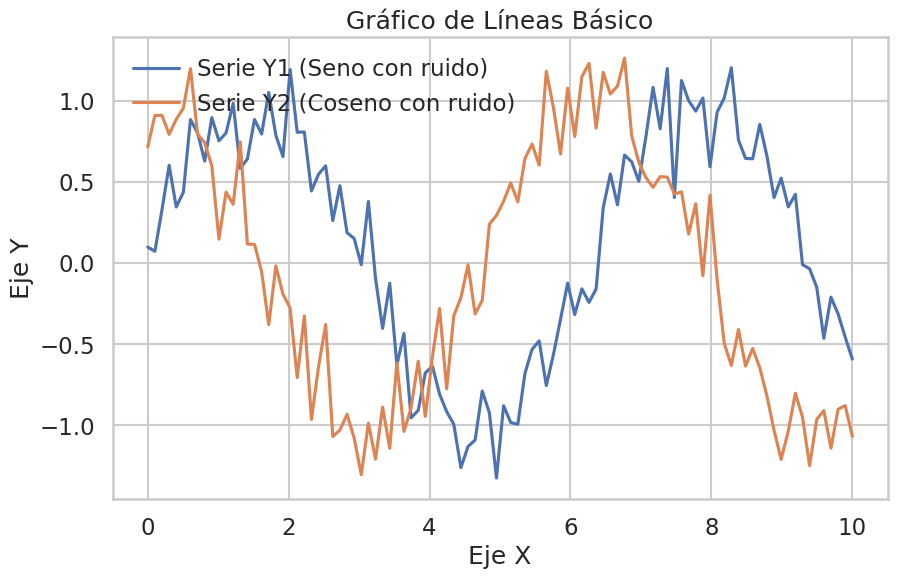

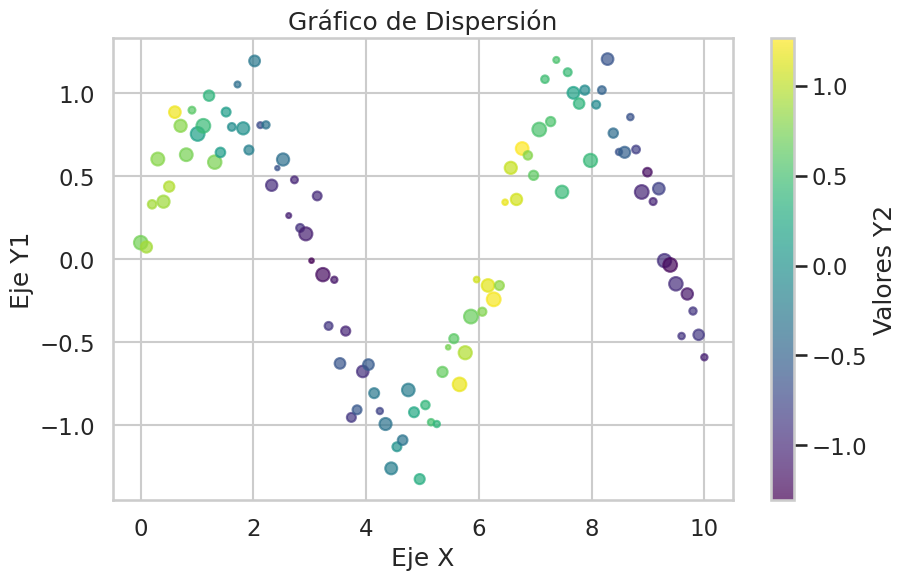

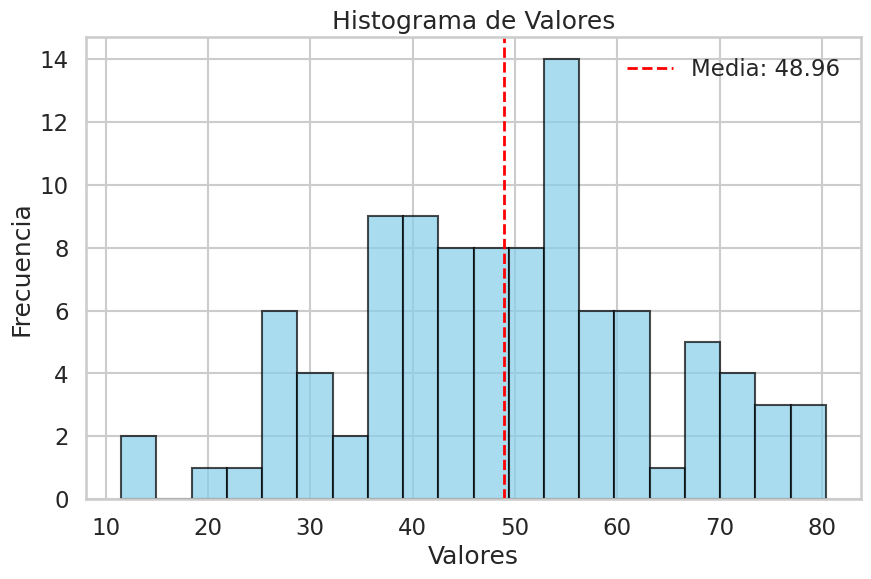

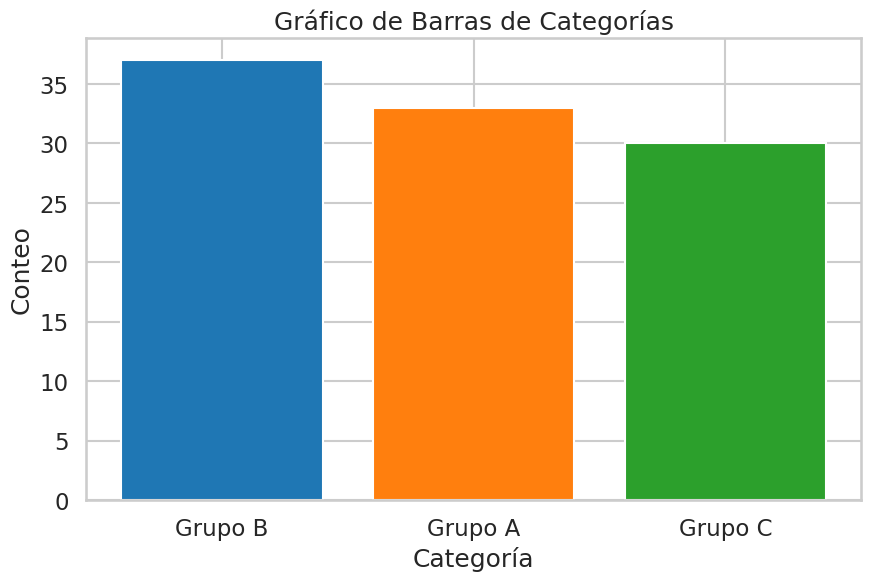

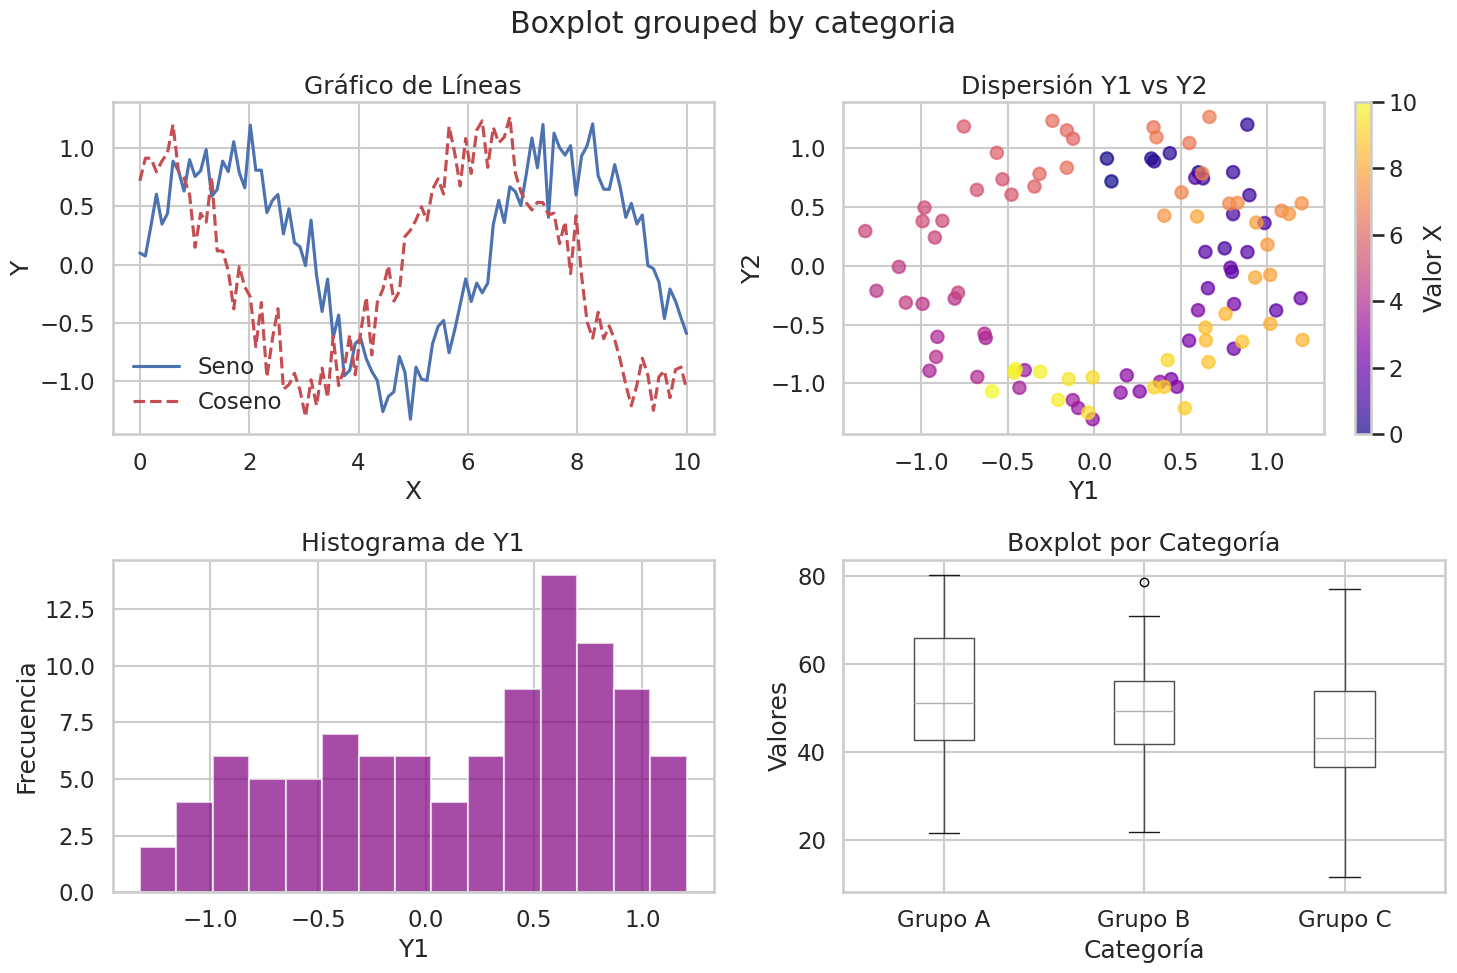


4.2 Personalización de gráficos


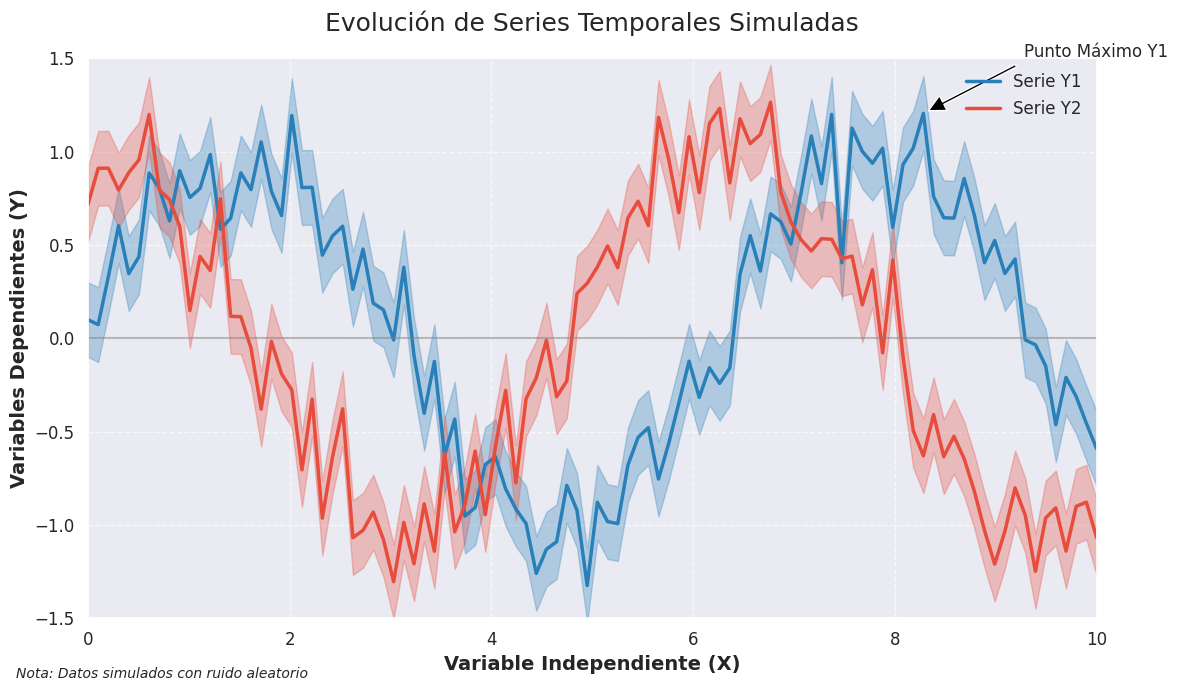

Estilos disponibles en Matplotlib:
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


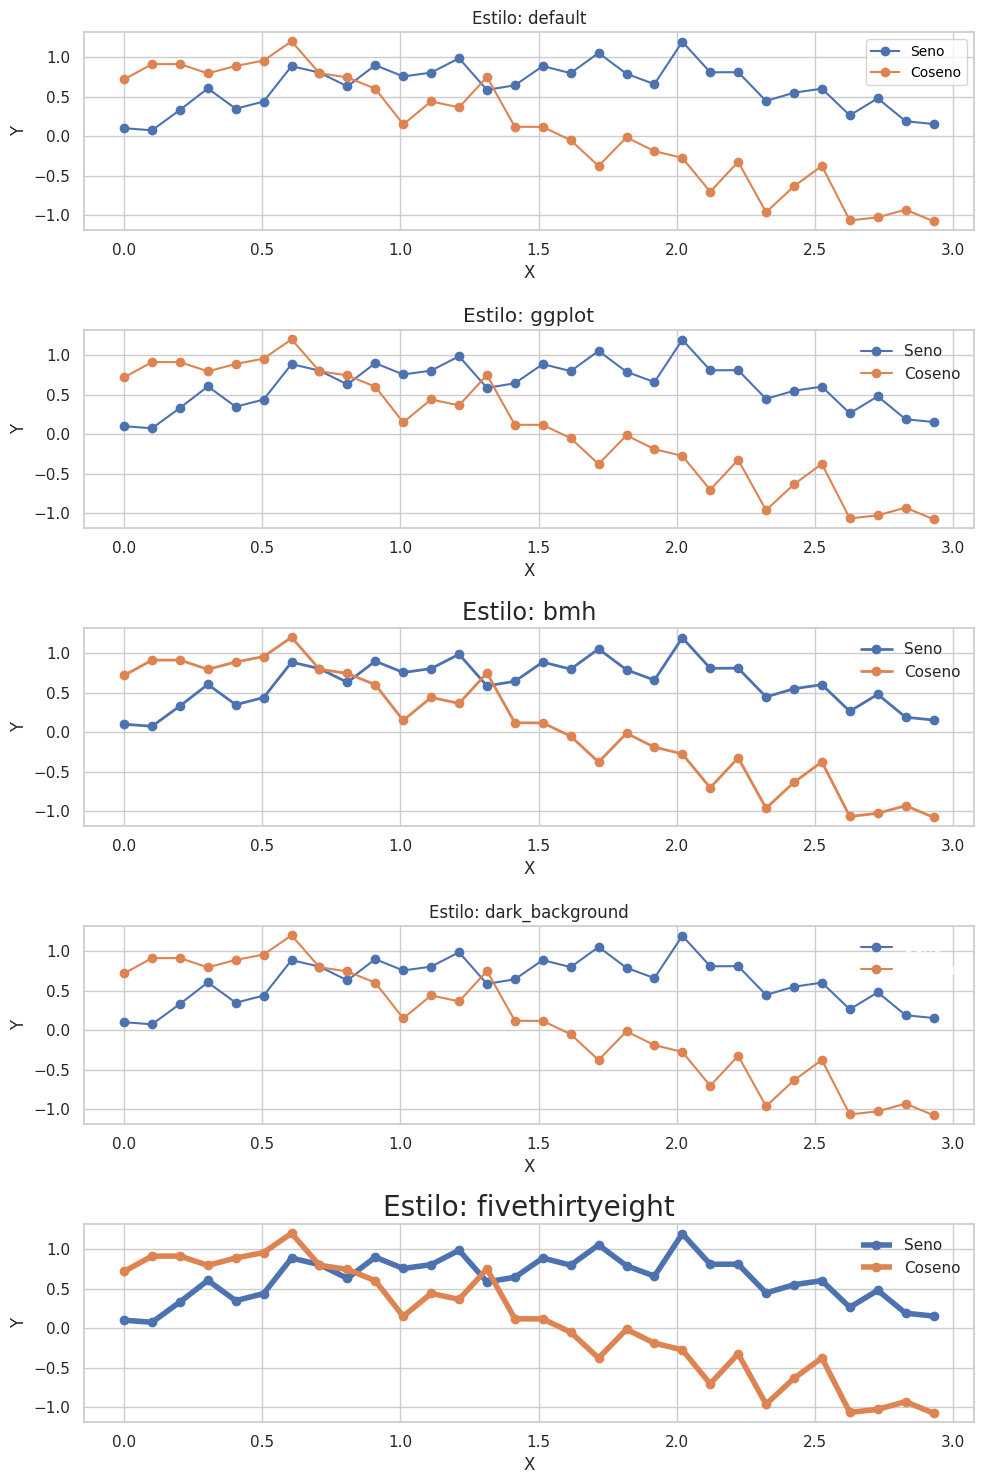


4.3 Uso de Seaborn


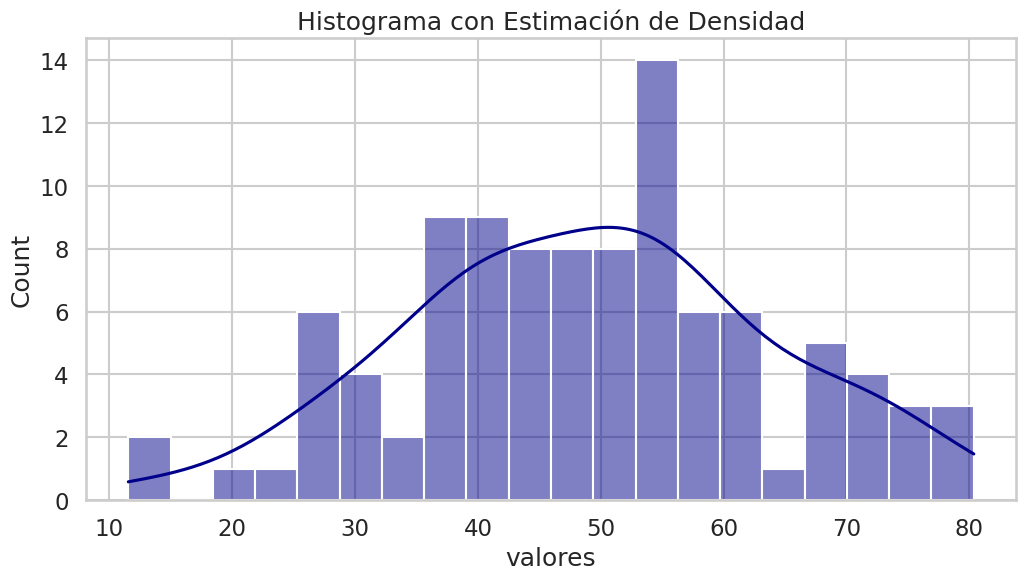

<ipython-input-5-6ef4ff47dea4>:229: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='categoria', y='valores', data=df_viz, palette='Set3')


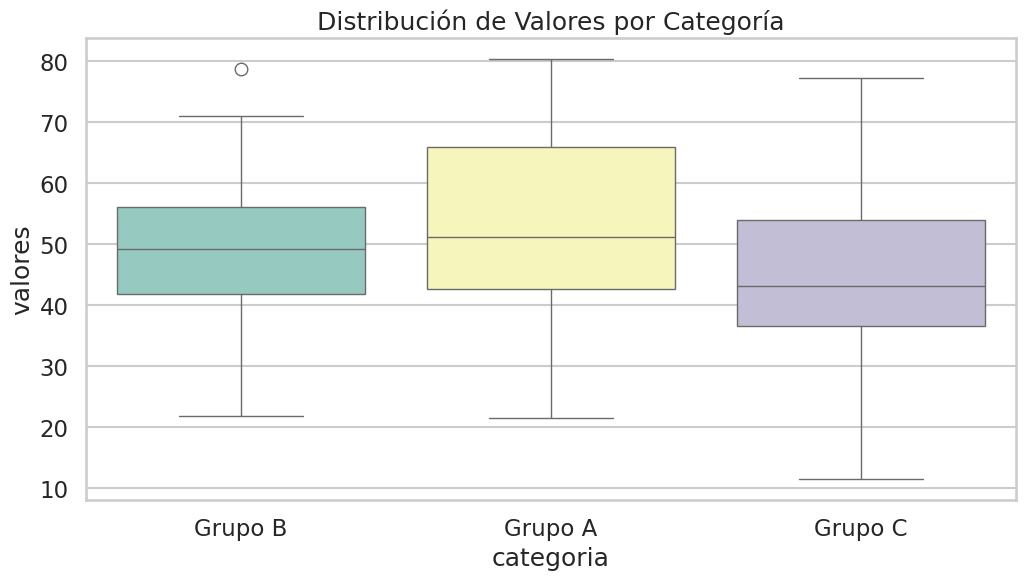

<ipython-input-5-6ef4ff47dea4>:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='categoria', y='valores', data=df_viz, palette='Set2', inner='quartile')


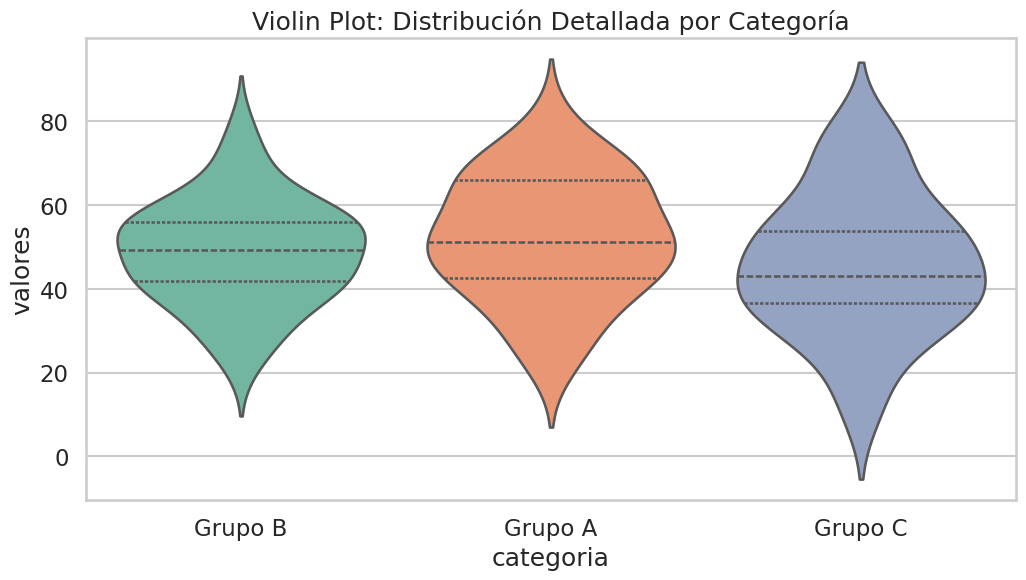

<ipython-input-5-6ef4ff47dea4>:242: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='categoria', y='valores', data=df_viz, jitter=True, palette='Set2')
<ipython-input-5-6ef4ff47dea4>:246: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='categoria', y='valores', data=df_viz, palette='Set2')


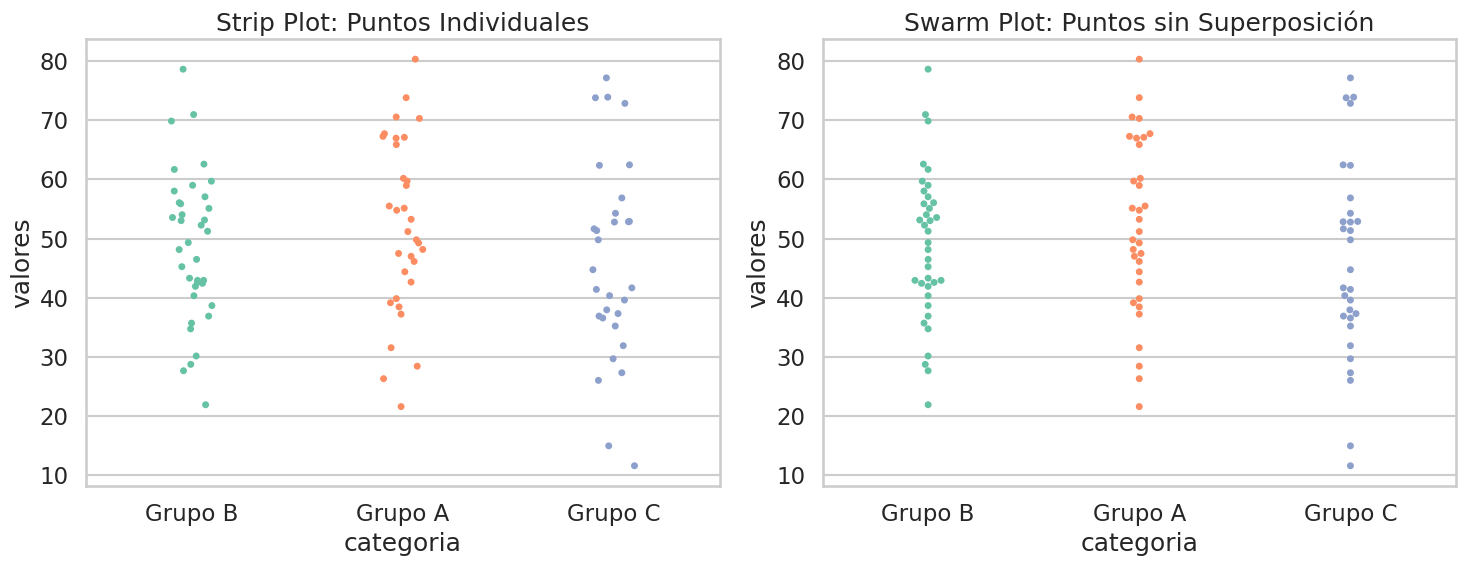

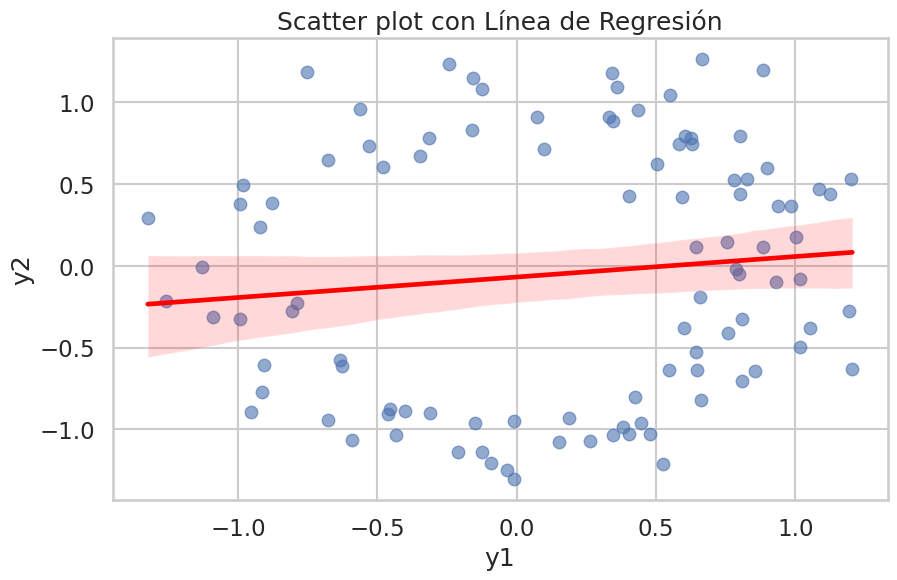

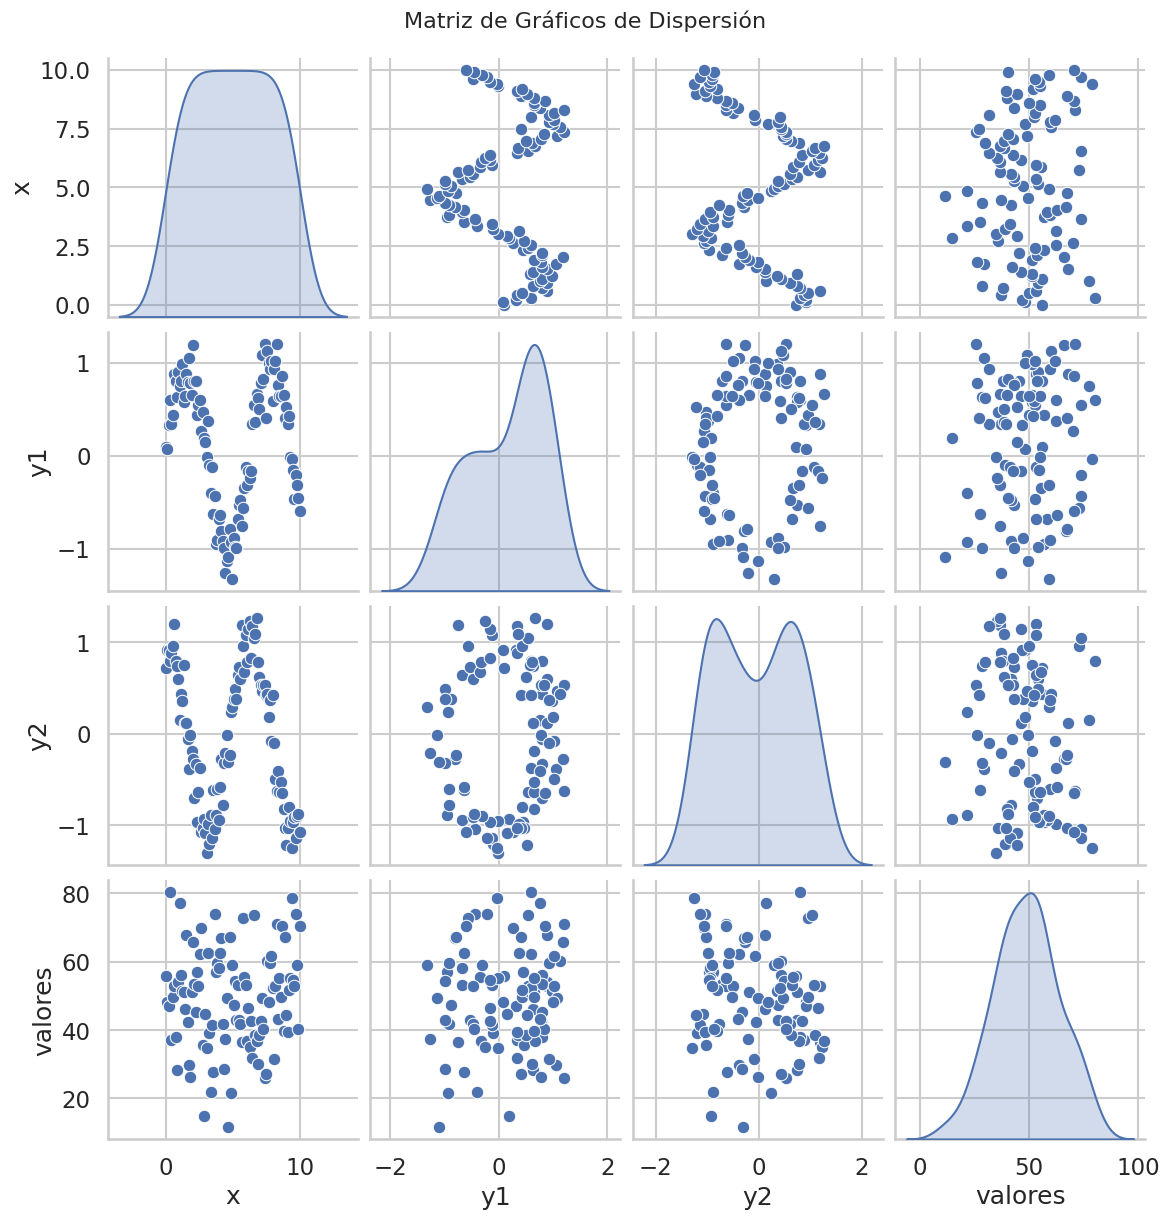

<Figure size 1000x1000 with 0 Axes>

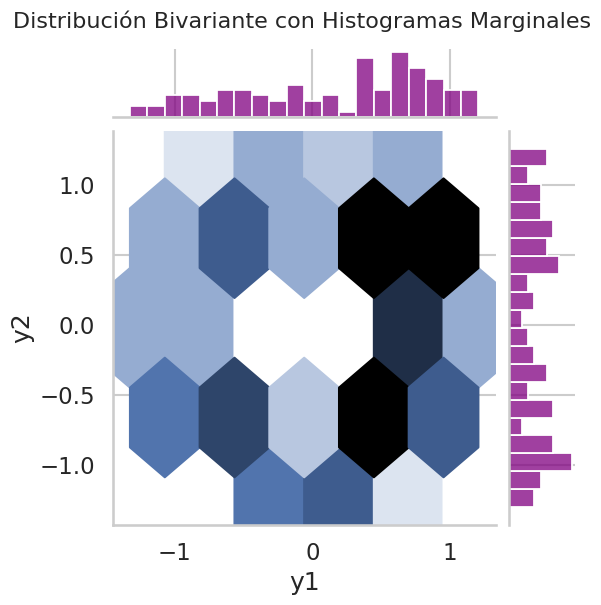

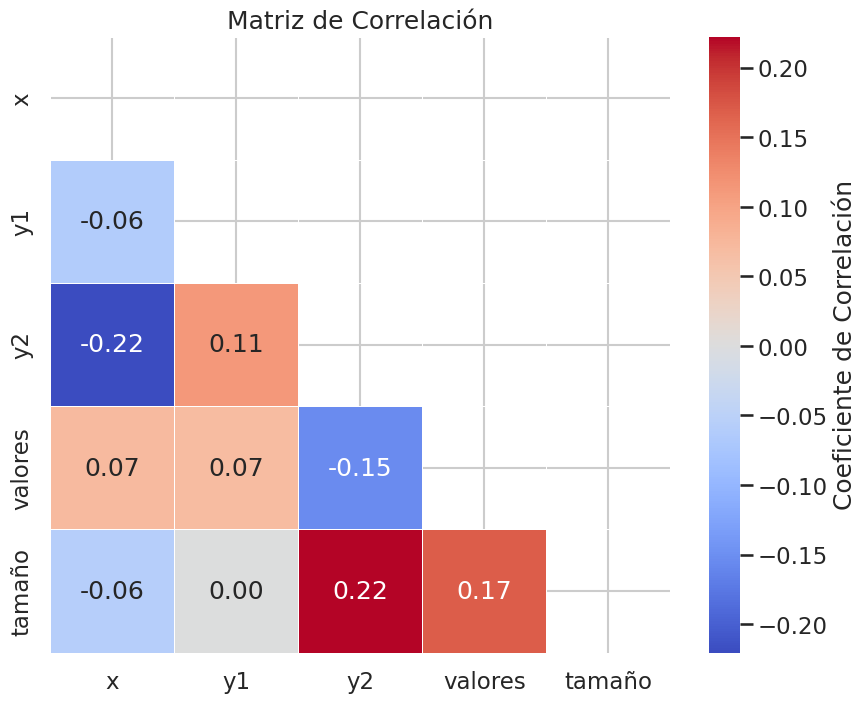

<ipython-input-5-6ef4ff47dea4>:285: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = df_viz.pivot_table(


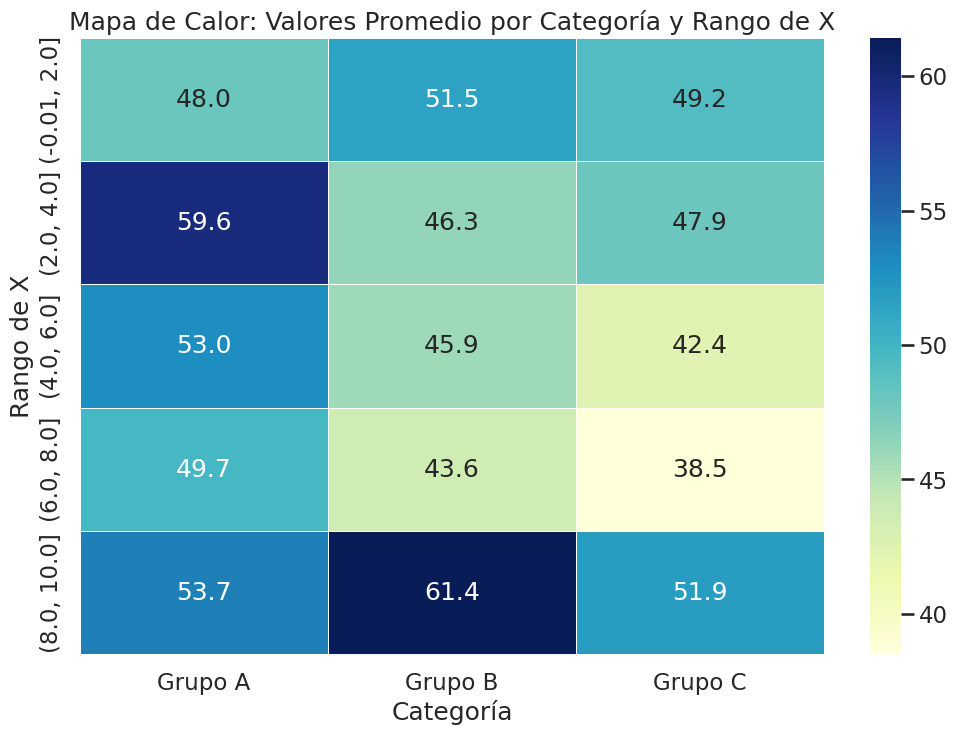


4.4 Visualización interactiva con Plotly

Nota: Las visualizaciones con Plotly son interactivas y se mostrarán 
correctamente al ejecutar en Google Colab. Aquí se incluye el código 
pero las visualizaciones no se verán en este texto.




4.5 Caso Práctico: Análisis exploratorio con gráficos
Conjunto de datos Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Estadísticas descriptivas por especie:
species                     setosa  versicolor  virginica
sepal length (cm) count  50.000000   50.000000  50.000000
                  mean    5.006000    5.936000   6.588000
                  std     0.352490    0.516171   0.635880
                  min     4.300000    4.900000   4.900000
                  25%     4.800000    5.6000

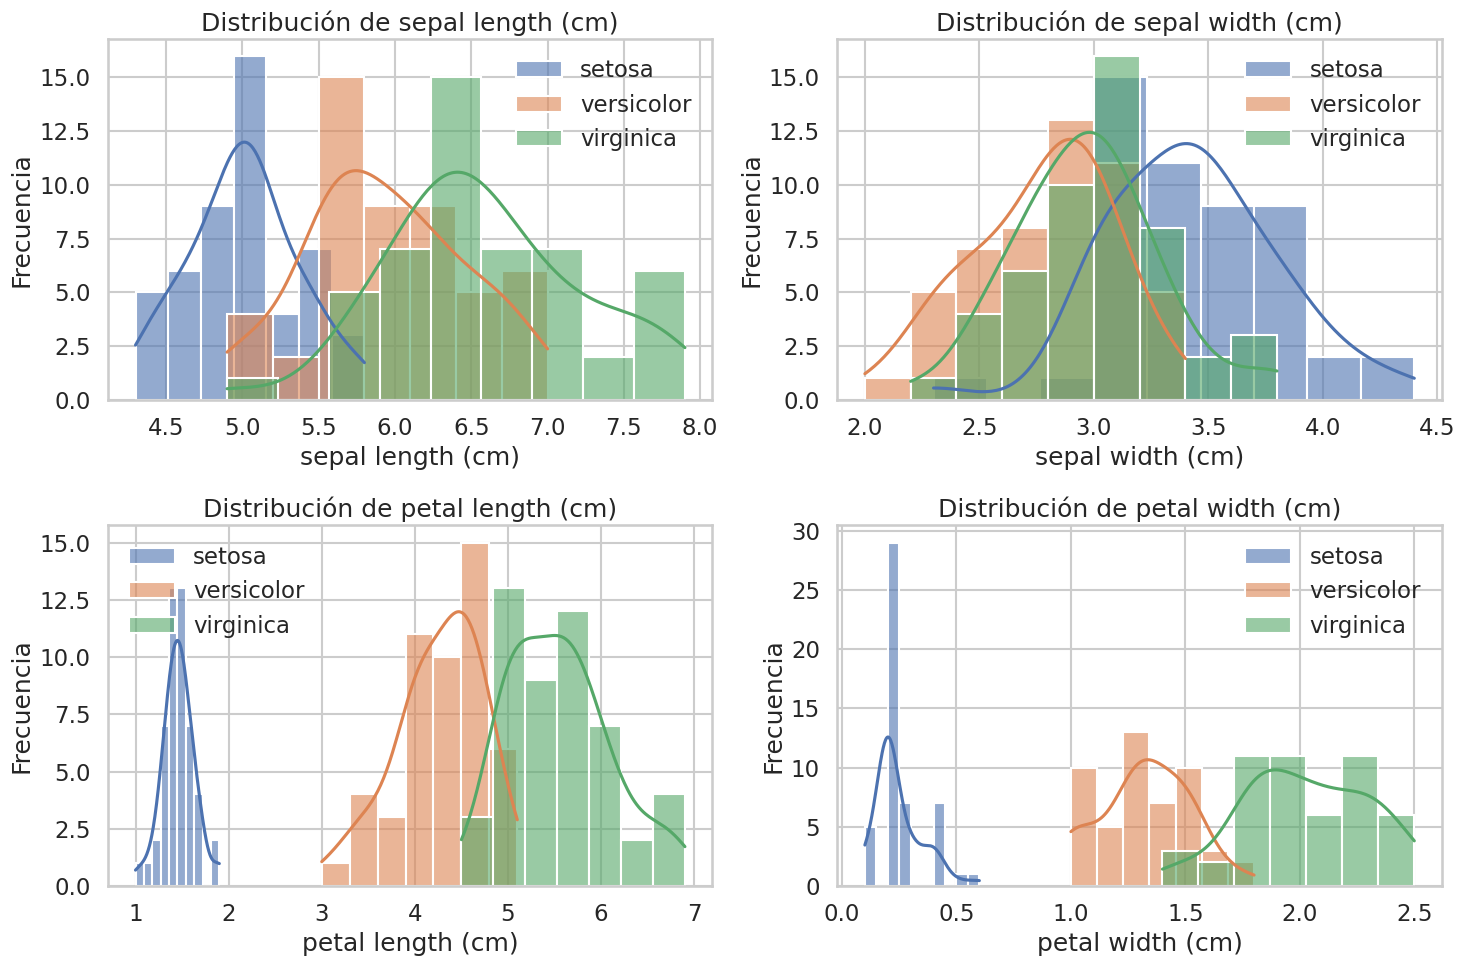

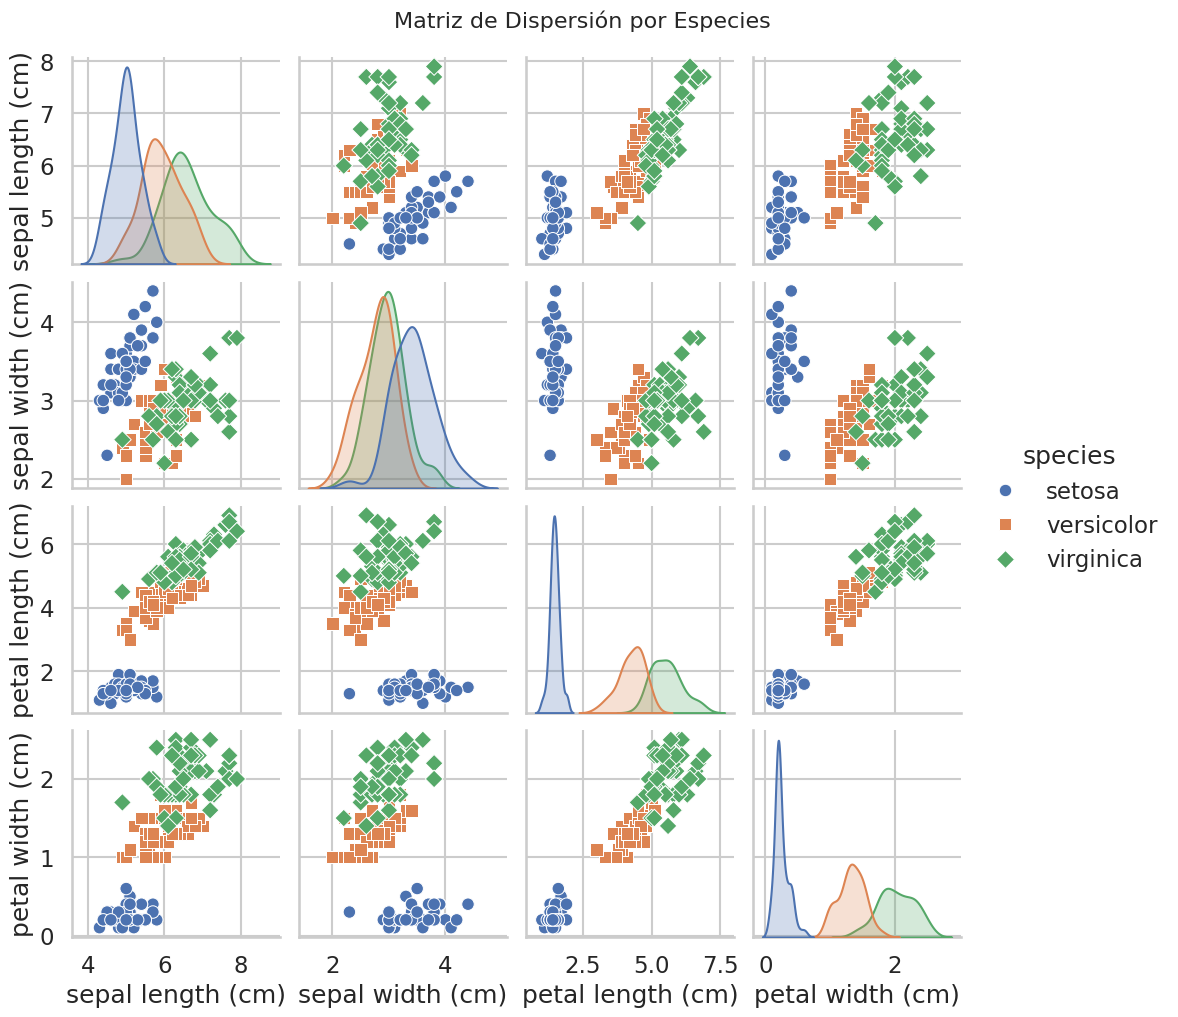

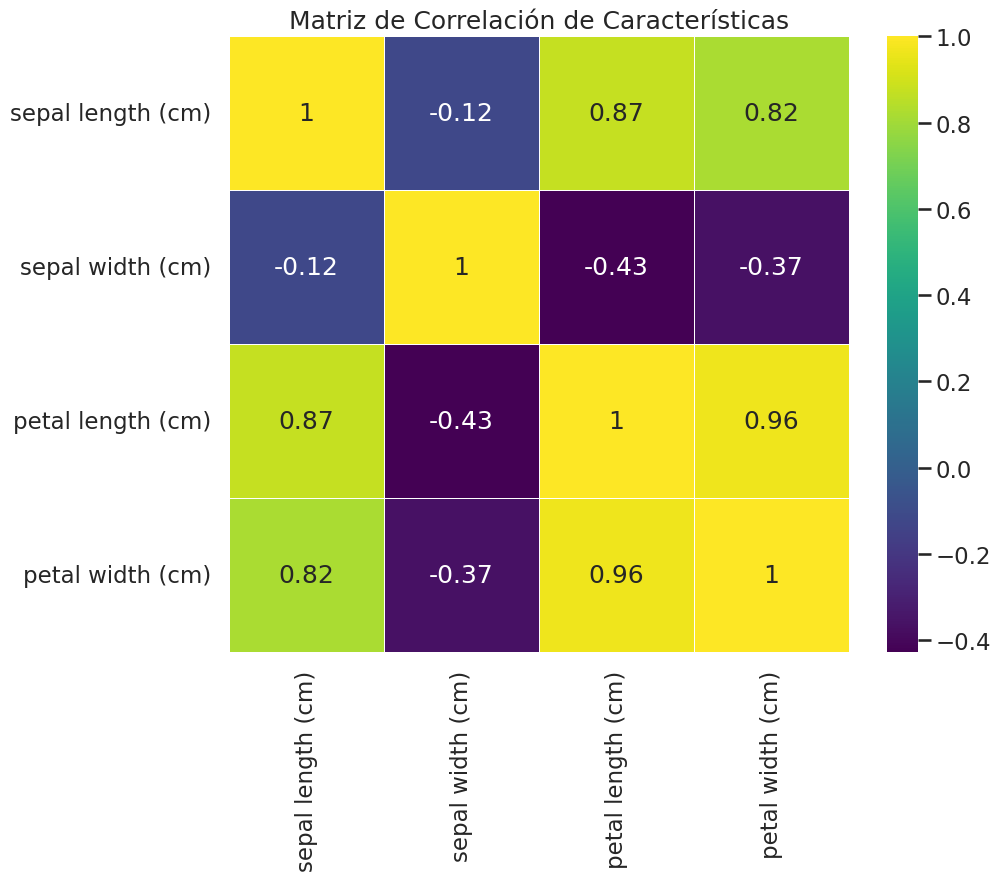

<ipython-input-5-6ef4ff47dea4>:381: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-5-6ef4ff47dea4>:381: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-5-6ef4ff47dea4>:381: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-5-6ef4ff47dea4>:381: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




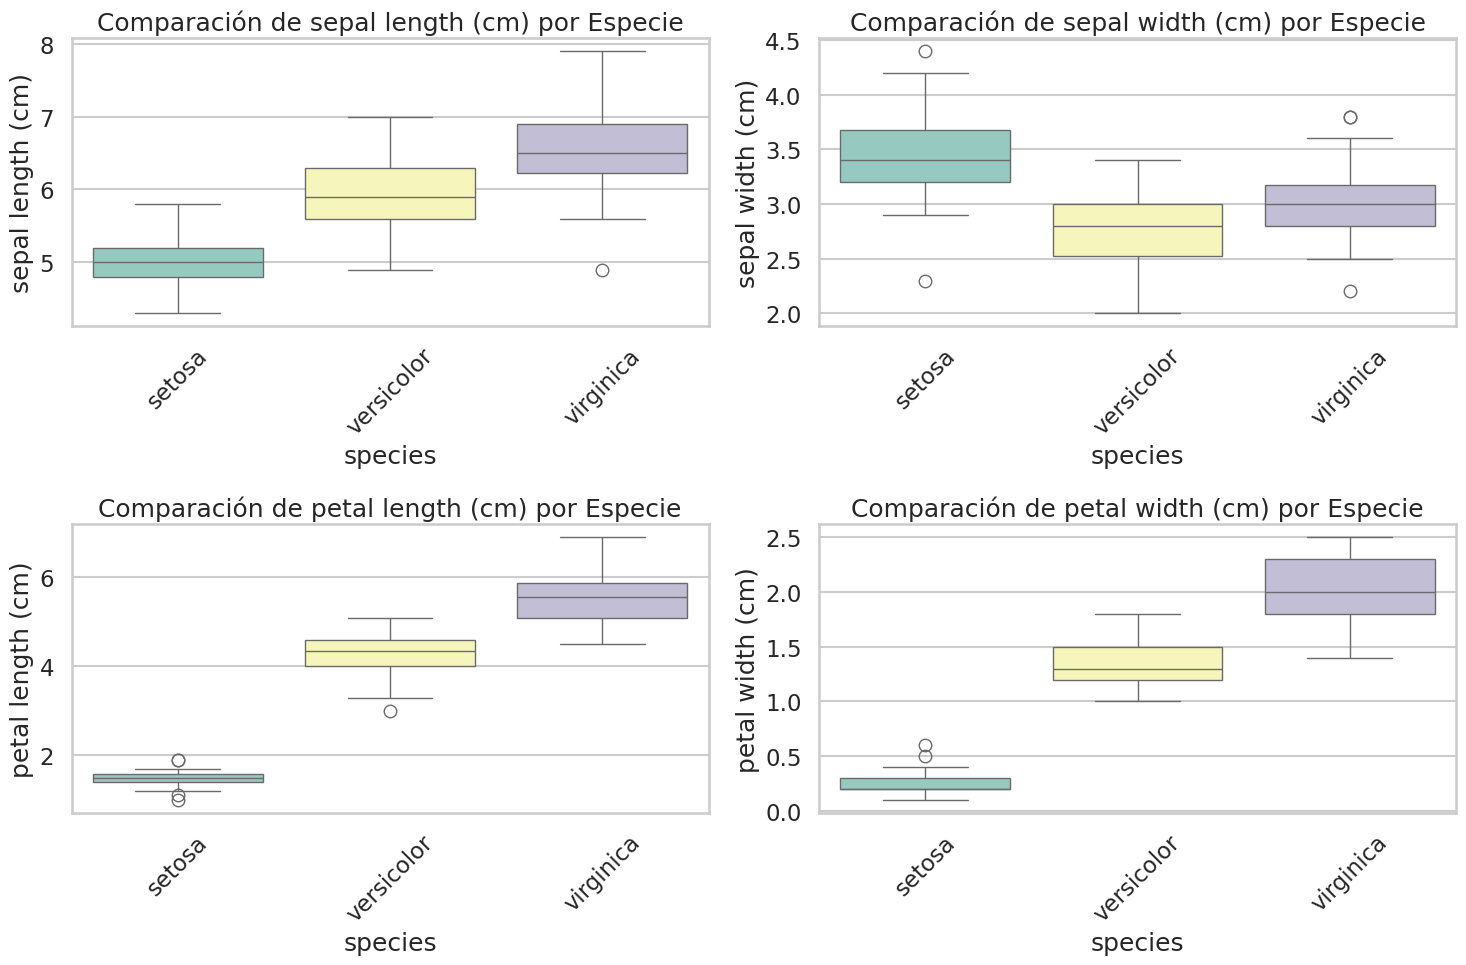

<ipython-input-5-6ef4ff47dea4>:399: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-5-6ef4ff47dea4>:404: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




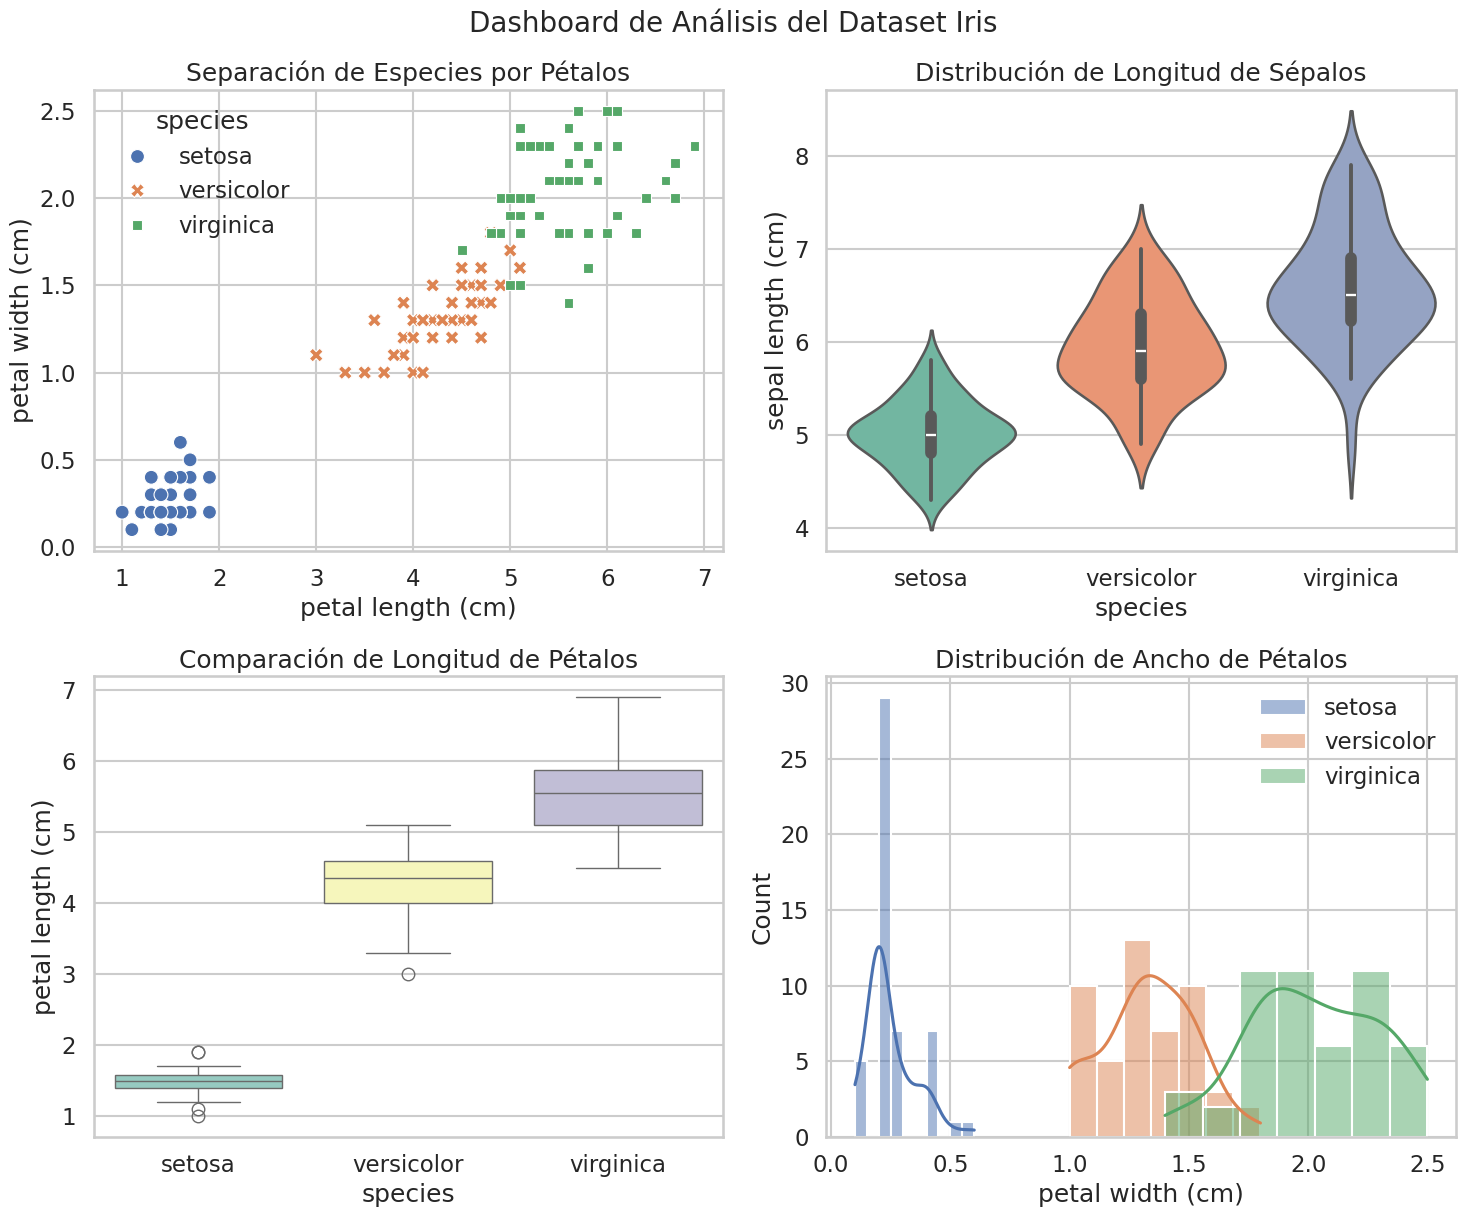


EJERCICIOS PROPUESTOS

1. Crear un gráfico de dispersión con tamaños y colores variables basados en los datos.
2. Hacer un gráfico de barras apiladas que muestre proporciones por categoría.
3. Crear un mapa de calor personalizado con una paleta de colores diferente.
4. Desarrollar un dashboard que combine al menos 3 tipos diferentes de visualizaciones.
5. Replicar uno de los gráficos anteriores usando Plotly para hacerlo interactivo.


Esto completa nuestro módulo de visualización de datos
Recuerda que la visualización efectiva es clave para comunicar resultados


In [ ]:
# Visualización de Datos con Matplotlib y Seaborn
# Autor: Dr. Claude
# Fecha: 10 de abril de 2025

# Importación de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_iris

# Configuración para visualización en notebook
%matplotlib inline

# Configuración directa de Seaborn (funciona en todas las versiones)
sns.set_theme(style="whitegrid")
sns.set_context("talk")

# Configuración para reproducibilidad
np.random.seed(42)

print("="*80)
print("MÓDULO 4: VISUALIZACIÓN DE DATOS CON MATPLOTLIB Y SEABORN")
print("="*80)

# Crear datos de ejemplo para visualización
n = 100
df_viz = pd.DataFrame({
    'x': np.linspace(0, 10, n),
    'y1': np.sin(np.linspace(0, 10, n)) + np.random.normal(0, 0.2, n),
    'y2': np.cos(np.linspace(0, 10, n)) + np.random.normal(0, 0.2, n),
    'categoria': np.random.choice(['Grupo A', 'Grupo B', 'Grupo C'], n),
    'tamaño': np.random.randint(10, 100, n),
    'valores': np.random.normal(50, 15, n)
})

print("Datos para visualización:")
print(df_viz.head())

# =========================================================================
# 4.1 Uso de Matplotlib: Gráficos básicos
# =========================================================================
print("\n" + "="*50)
print("4.1 Uso de Matplotlib: Gráficos básicos")
print("="*50)

# ----- Gráfico de líneas básico -----
plt.figure(figsize=(10, 6))
plt.plot(df_viz['x'], df_viz['y1'], label='Serie Y1 (Seno con ruido)')
plt.plot(df_viz['x'], df_viz['y2'], label='Serie Y2 (Coseno con ruido)')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de Líneas Básico')
plt.legend()
plt.grid(True)
plt.show()

# ----- Gráfico de dispersión (scatter) -----
plt.figure(figsize=(10, 6))
plt.scatter(df_viz['x'], df_viz['y1'], alpha=0.7, s=df_viz['tamaño'],
            c=df_viz['y2'], cmap='viridis')
plt.colorbar(label='Valores Y2')
plt.xlabel('Eje X')
plt.ylabel('Eje Y1')
plt.title('Gráfico de Dispersión')
plt.show()

# ----- Histograma -----
plt.figure(figsize=(10, 6))
plt.hist(df_viz['valores'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(df_viz['valores'].mean(), color='red', linestyle='dashed',
            linewidth=2, label=f'Media: {df_viz["valores"].mean():.2f}')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Valores')
plt.legend()
plt.show()

# ----- Gráfico de barras -----
conteo_categorias = df_viz['categoria'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(conteo_categorias.index, conteo_categorias.values,
        color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.title('Gráfico de Barras de Categorías')
plt.show()

# ----- Subplots (múltiples gráficos en una figura) -----
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Subplot 1: Líneas
axes[0, 0].plot(df_viz['x'], df_viz['y1'], 'b-', label='Seno')
axes[0, 0].plot(df_viz['x'], df_viz['y2'], 'r--', label='Coseno')
axes[0, 0].set_title('Gráfico de Líneas')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('Y')
axes[0, 0].legend()

# Subplot 2: Scatter
scatter = axes[0, 1].scatter(df_viz['y1'], df_viz['y2'], c=df_viz['x'],
                            cmap='plasma', alpha=0.7)
axes[0, 1].set_title('Dispersión Y1 vs Y2')
axes[0, 1].set_xlabel('Y1')
axes[0, 1].set_ylabel('Y2')
fig.colorbar(scatter, ax=axes[0, 1], label='Valor X')

# Subplot 3: Histograma
axes[1, 0].hist(df_viz['y1'], bins=15, alpha=0.7, color='purple')
axes[1, 0].set_title('Histograma de Y1')
axes[1, 0].set_xlabel('Y1')
axes[1, 0].set_ylabel('Frecuencia')

# Subplot 4: Boxplot por categoría
boxplot = df_viz.boxplot(column='valores', by='categoria', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot por Categoría')
axes[1, 1].set_xlabel('Categoría')
axes[1, 1].set_ylabel('Valores')

plt.tight_layout()
plt.show()

# =========================================================================
# 4.2 Personalización de gráficos
# =========================================================================
print("\n" + "="*50)
print("4.2 Personalización de gráficos")
print("="*50)

# Configurar un estilo oscuro con Seaborn
sns.set_theme(style="darkgrid")

# Crear una figura con dimensiones específicas
plt.figure(figsize=(12, 7))

# Gráfico principal con personalización
plt.plot(df_viz['x'], df_viz['y1'], linewidth=2.5, color='#2980b9', label='Serie Y1')
plt.fill_between(df_viz['x'], df_viz['y1'] - 0.2, df_viz['y1'] + 0.2,
                color='#2980b9', alpha=0.3)

plt.plot(df_viz['x'], df_viz['y2'], linewidth=2.5, color='#e74c3c', label='Serie Y2')
plt.fill_between(df_viz['x'], df_viz['y2'] - 0.2, df_viz['y2'] + 0.2,
                color='#e74c3c', alpha=0.3)

# Personalización de ejes
plt.xlabel('Variable Independiente (X)', fontsize=14, fontweight='bold')
plt.ylabel('Variables Dependientes (Y)', fontsize=14, fontweight='bold')
plt.title('Evolución de Series Temporales Simuladas', fontsize=18, pad=20)

# Añadir cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Personalizar ticks
plt.xticks(np.arange(0, 11, 2), fontsize=12)
plt.yticks(fontsize=12)

# Añadir anotaciones
plt.annotate('Punto Máximo Y1',
             xy=(df_viz['x'][df_viz['y1'].argmax()], df_viz['y1'].max()),
             xytext=(df_viz['x'][df_viz['y1'].argmax()]+1, df_viz['y1'].max()+0.3),
             arrowprops=dict(facecolor='black', shrink=0.05, width=2),
             fontsize=12)

# Añadir líneas de referencia
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)

# Leyenda mejorada
plt.legend(loc='upper right', fontsize=12, fancybox=True, shadow=True)

# Limitar ejes
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

# Añadir texto explicativo
plt.figtext(0.02, 0.02, 'Nota: Datos simulados con ruido aleatorio',
           fontsize=10, style='italic')

# Añadir espacio para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Restablecer el estilo para no afectar a los próximos gráficos
sns.set_theme(style="whitegrid")

# Uso de estilos predefinidos de matplotlib
print("Estilos disponibles en Matplotlib:")
print(plt.style.available)

# Demostración rápida de estilos seguros (sin usar estilos de Seaborn)
estilos_ejemplo = ['default', 'ggplot', 'bmh', 'dark_background', 'fivethirtyeight']
fig, axes = plt.subplots(len(estilos_ejemplo), 1, figsize=(10, 15))

for i, estilo in enumerate(estilos_ejemplo):
    with plt.style.context(estilo):
        axes[i].plot(df_viz['x'][:30], df_viz['y1'][:30], 'o-')
        axes[i].plot(df_viz['x'][:30], df_viz['y2'][:30], 'o-')
        axes[i].set_title(f'Estilo: {estilo}')
        axes[i].set_xlabel('X')
        axes[i].set_ylabel('Y')
        axes[i].legend(['Seno', 'Coseno'])

plt.tight_layout()
plt.show()

# =========================================================================
# 4.3 Uso de Seaborn
# =========================================================================
print("\n" + "="*50)
print("4.3 Uso de Seaborn")
print("="*50)

# Asegurar configuración de Seaborn
sns.set_theme(style="whitegrid")
sns.set_context("talk")

# ----- Gráficos estadísticos univariantes -----

# 1. Histograma y KDE
plt.figure(figsize=(12, 6))
sns.histplot(df_viz['valores'], kde=True, bins=20, color='darkblue')
plt.title('Histograma con Estimación de Densidad')
plt.show()

# 2. Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='categoria', y='valores', data=df_viz, palette='Set3')
plt.title('Distribución de Valores por Categoría')
plt.show()

# 3. Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='categoria', y='valores', data=df_viz, palette='Set2', inner='quartile')
plt.title('Violin Plot: Distribución Detallada por Categoría')
plt.show()

# 4. Strip plot y Swarm plot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.stripplot(x='categoria', y='valores', data=df_viz, jitter=True, palette='Set2')
plt.title('Strip Plot: Puntos Individuales')

plt.subplot(1, 2, 2)
sns.swarmplot(x='categoria', y='valores', data=df_viz, palette='Set2')
plt.title('Swarm Plot: Puntos sin Superposición')
plt.tight_layout()
plt.show()

# ----- Gráficos de relaciones bivariantes -----

# 1. Scatter plot con regresión lineal
plt.figure(figsize=(10, 6))
sns.regplot(x='y1', y='y2', data=df_viz, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatter plot con Línea de Regresión')
plt.show()

# 2. Pair plot (matriz de dispersión)
sns.pairplot(df_viz[['x', 'y1', 'y2', 'valores']], diag_kind='kde', height=3)
plt.suptitle('Matriz de Gráficos de Dispersión', y=1.02, fontsize=16)
plt.show()

# 3. Joint plot (distribución bivariante)
plt.figure(figsize=(10, 10))
g = sns.jointplot(x='y1', y='y2', data=df_viz, kind='hex',
             marginal_kws={'bins':20, 'color':'purple'})
plt.suptitle('Distribución Bivariante con Histogramas Marginales', y=1.02, fontsize=16)
plt.show()

# ----- Mapas de calor (heatmaps) -----

# 1. Matriz de correlación
plt.figure(figsize=(10, 8))
corr = df_viz[['x', 'y1', 'y2', 'valores', 'tamaño']].corr()
# Máscara para mostrar solo la mitad inferior
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=mask,
           linewidths=0.5, cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Matriz de Correlación')
plt.show()

# 2. Mapa de calor de datos agrupados
# Crear datos agrupados por categoría
pivot_data = df_viz.pivot_table(
    index=pd.cut(df_viz['x'], bins=5),
    columns='categoria',
    values='valores',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=0.5)
plt.title('Mapa de Calor: Valores Promedio por Categoría y Rango de X')
plt.xlabel('Categoría')
plt.ylabel('Rango de X')
plt.show()

# =========================================================================
# 4.4 Visualización interactiva con Plotly
# =========================================================================
print("\n" + "="*50)
print("4.4 Visualización interactiva con Plotly")
print("="*50)

print("""
Nota: Las visualizaciones con Plotly son interactivas y se mostrarán
correctamente al ejecutar en Google Colab. Aquí se incluye el código
pero las visualizaciones no se verán en este texto.
""")

# Gráficos interactivos con Plotly
# Scatter plot interactivo
fig = px.scatter(df_viz, x='y1', y='y2', color='categoria', size='tamaño',
                hover_data=['x', 'valores'], opacity=0.7,
                title='Gráfico de Dispersión Interactivo')
fig.show()

# Histograma interactivo
fig = px.histogram(df_viz, x='valores', color='categoria', marginal='box',
                  title='Histograma Interactivo con Box Plot Marginal')
fig.show()

# Gráfico de líneas interactivo
fig = px.line(df_viz, x='x', y=['y1', 'y2'],
             title='Evolución de Series Temporales')
fig.show()

# =========================================================================
# 4.5 Caso Práctico: Análisis exploratorio con gráficos
# =========================================================================
print("\n" + "="*50)
print("4.5 Caso Práctico: Análisis exploratorio con gráficos")
print("="*50)

# Cargar datos para análisis exploratorio (usaremos el conjunto Iris)
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = [iris.target_names[i] for i in iris.target]

print("Conjunto de datos Iris:")
print(df_iris.head())

# 1. Análisis descriptivo inicial
print("\nEstadísticas descriptivas por especie:")
print(df_iris.groupby('species').describe().T)

# 2. Visualización de distribuciones
plt.figure(figsize=(15, 10))

# Histogramas
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    for species in iris.target_names:
        sns.histplot(df_iris[df_iris['species'] == species][feature],
                    kde=True, label=species, alpha=0.6)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend()

plt.tight_layout()
plt.show()

# 3. Relaciones entre variables
sns.pairplot(df_iris, hue='species', markers=['o', 's', 'D'], height=2.5)
plt.suptitle('Matriz de Dispersión por Especies', y=1.02, fontsize=16)
plt.show()

# 4. Correlaciones entre variables
plt.figure(figsize=(10, 8))
corr = df_iris.drop('species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Matriz de Correlación de Características')
plt.show()

# 5. Gráficos de caja para comparar distribuciones
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df_iris, palette='Set3')
    plt.title(f'Comparación de {feature} por Especie')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 6. Dashboard simplificado con Seaborn
# Crear un dashboard de 2x2
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Panel 1: Scatter plot de características más distintivas
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
               hue='species', style='species', s=100,
               data=df_iris, ax=axes[0,0])
axes[0,0].set_title('Separación de Especies por Pétalos')

# Panel 2: Distribución de longitud de sépalos
sns.violinplot(x='species', y='sepal length (cm)',
              data=df_iris, palette='Set2', ax=axes[0,1])
axes[0,1].set_title('Distribución de Longitud de Sépalos')

# Panel 3: Distribución de longitud de pétalos
sns.boxplot(x='species', y='petal length (cm)',
           data=df_iris, palette='Set3', ax=axes[1,0])
axes[1,0].set_title('Comparación de Longitud de Pétalos')

# Panel 4: Histogramas de ancho de pétalos
for species in iris.target_names:
    subset = df_iris[df_iris['species'] == species]
    sns.histplot(subset['petal width (cm)'],
                kde=True, label=species, ax=axes[1,1])
axes[1,1].set_title('Distribución de Ancho de Pétalos')
axes[1,1].legend()

plt.tight_layout()
plt.suptitle('Dashboard de Análisis del Dataset Iris', fontsize=20, y=1.02)
plt.show()

# =========================================================================
# Ejercicios propuestos
# =========================================================================
print("\n" + "="*50)
print("EJERCICIOS PROPUESTOS")
print("="*50)

print("""
1. Crear un gráfico de dispersión con tamaños y colores variables basados en los datos.
2. Hacer un gráfico de barras apiladas que muestre proporciones por categoría.
3. Crear un mapa de calor personalizado con una paleta de colores diferente.
4. Desarrollar un dashboard que combine al menos 3 tipos diferentes de visualizaciones.
5. Replicar uno de los gráficos anteriores usando Plotly para hacerlo interactivo.
""")

# Mensaje de cierre
print("\n" + "="*50)
print("Esto completa nuestro módulo de visualización de datos")
print("Recuerda que la visualización efectiva es clave para comunicar resultados")
print("="*50)